In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
link_artificial1d = r'https://raw.githubusercontent.com/Danieloliver1/UFC_mestrado/main/Sigaa_UFC/1_semestre/aprendizagem_automatica/lista_01_ama/artificial1d.csv?token=GHSAT0AAAAAACPK6ODCASMCAGSNVYGIQDF6ZPMUW4Q'

In [3]:

dados = np.genfromtxt(link_artificial1d, delimiter=',') # numpy

In [4]:
dados.shape

(30, 2)

In [5]:
# passando os valore de x
# Selecionando todas as colunas exceto a última
x = dados[:,:-1]

# passando os valore de y
# Pegando somente a última coluna
y = dados[:, -1]

##**Questão 1**

##Considere o conjunto de dados disponível em articial1d.csv organizado em
##duas colunas, x e y.                                                          Seja um modelo de regressão linear para yˆ = f(x).


##a) Apresente os parâmetros do modelo e o MSE (erro quadrático médio)
##obtidos pelo algoritmo OLS (mínimos quadrados ordinários). Plote
##a reta resultante sobre os dados.

![regressao_linear](https://www.alura.com.br/artigos/assets/desvendando-a-regressao-linear/imagem4.png)




In [6]:
# Adicionando termo de bias para X a primeira coluna para ter valores 1
X_b = np.c_[np.ones(len(x)), x.reshape(-1, 1)]

In [7]:
# Inicializando os parâmetros aleatórios
#teta = np.random.randn(2,1)
teta = np.array([0, 0])  # Theta inicial
teta

array([0, 0])

In [8]:
# Definindo taxa de aprendizado e número de iterações
taxa_de_aprendizado = 0.01
interacoes = 500

In [9]:
def MSE(X, y, teta):
    m = len(y)  # Número de exemplos de treinamento
    predicoes = X.dot(teta)  # Calcula as previsões usando o modelo linear
    erro_quadratico_medio = np.square(predicoes - y)  # Calcula os erros quadrados
    cost = (1/(2*m)) * np.sum(erro_quadratico_medio)  # Calcula o custo (erro quadrático médio)
    return cost


In [10]:
def regressao_ols(x, y):
    """
    Calcula os parâmetros do modelo de regressão linear utilizando a equação normal.

    Parâmetros:
    - x: matriz de características
    - y: vetor de saída

    Retorna:
    - theta: vetor de parâmetros do modelo
    """

    # Verificar se a primeira coluna de x é composta por 1s
    if np.all(x[:, 0] == 1):
        matriz_x = x
    else:
        # Adicionando a primeira coluna de 1s à matriz de características
        matriz_x = np.hstack((np.ones((x.shape[0], 1)), x))

    # Calcular os parâmetros do modelo de regressão linear
    matriz_x_transposta = matriz_x.T
    produto_matriz = matriz_x_transposta @ matriz_x
    inverso_da_matriz = np.linalg.inv(produto_matriz)
    theta = inverso_da_matriz @ matriz_x_transposta @ y
    return theta


In [11]:
# Realizando a regressão linear usando OLS
theta_ols = regressao_ols(X_b, y)
# Calculando as previsões do modelo
y_previsto_ols = X_b.dot(theta_ols)

In [12]:
mse = np.mean((y_previsto_ols - y) ** 2)
print(f"Parâmetros do modelo (theta): {theta_ols}")
print(f"MSE (Erro Quadrático Médio): {mse}")

Parâmetros do modelo (theta): [0.06761792 1.57486517]
MSE (Erro Quadrático Médio): 0.21340090132936987


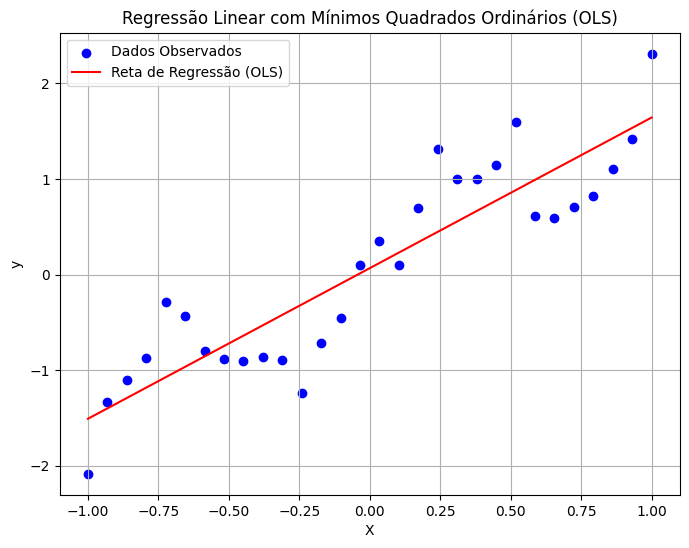

In [13]:
# Plotando os dados e a reta resultante
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', label='Dados Observados')
plt.plot(x, y_previsto_ols, color='red', label='Reta de Regressão (OLS)')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regressão Linear com Mínimos Quadrados Ordinários (OLS)')
plt.legend()
plt.grid(True)
plt.show()

#b) Apresente os parâmetros do modelo, o MSE e a curva de aprendizagem

#obtidos pelo algoritmo GD (gradiente descendente). Plote a reta resultante sobre os dados.

In [14]:
def gradiente_descendente(X, y, teta, taxa_de_aprendizado, interacoes):

    """
    Calcula os parâmetros do modelo de regressão linear utilizando gradiente descendente.

    Parâmetros:
    - x: matriz de características obs a matriz ja vem com a bias 1s
    - y: vetor de saída

    Retorna:
    - theta: vetor de parâmetros do modelo
    - custo: vetor de taxas de erros a cada intereção
    - teta_interacoes é um vetor que contem vários coeficientes a cada interação.
    """
    m = len(y)  # Número  de treinamento
    custo = np.zeros(interacoes)  # Inicializa um array para armazenar o histórico de custos durante as iterações
    teta__interacoes = np.zeros((interacoes, len(teta)))  # Inicializa um array para armazenar o histórico de parâmetros theta durante as iterações

    for i in range(interacoes):
        # Calcula o gradientee da função de custo em relação aos parâmetros theta
        gradiente = (1/m) * X.T.dot(X.dot(teta) - y)
        # Atualiza os parâmetros theta usando o gradientee descendente
        teta = teta - taxa_de_aprendizado * gradiente
        # Calcula o custo após a atualização dos parâmetros e armazena no histórico de custos

        custo[i] = MSE(X, y, teta)
        # Armazena os parâmetros theta atualizados no histórico
        teta__interacoes[i] = teta
    return teta, custo, teta__interacoes


In [15]:
teta_final, custo, teta_de_todas_interecoes = gradiente_descendente(X_b, y, teta, taxa_de_aprendizado, interacoes)

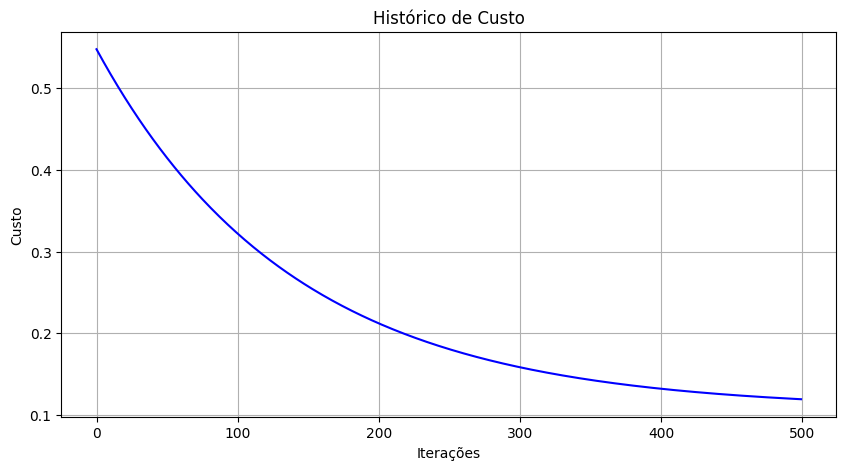

In [16]:
# Oo histórico de custo
plt.figure(figsize=(10, 5))
plt.plot(range(interacoes), custo, color='blue')
plt.title('Histórico de Custo')
plt.xlabel('Iterações')
plt.ylabel('Custo')
plt.grid(True)
plt.show()


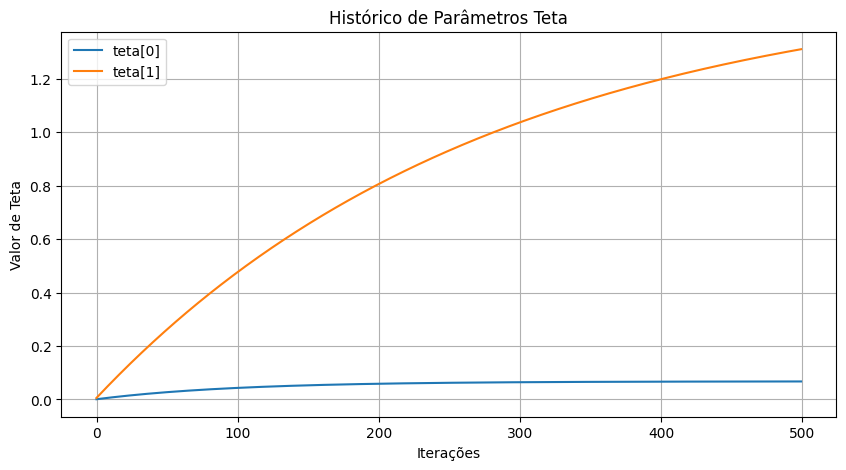

In [17]:
# Plotar o histórico de parâmetros theta
plt.figure(figsize=(10, 5))
for i in range(len(teta)):
    plt.plot(range(interacoes), teta_de_todas_interecoes[:, i], label=f'teta[{i}]')
plt.title('Histórico de Parâmetros Teta')
plt.xlabel('Iterações')
plt.ylabel('Valor de Teta')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
# Calcular previsões usando os parâmetros theta finais
y_previsto_final = X_b.dot(teta_final)

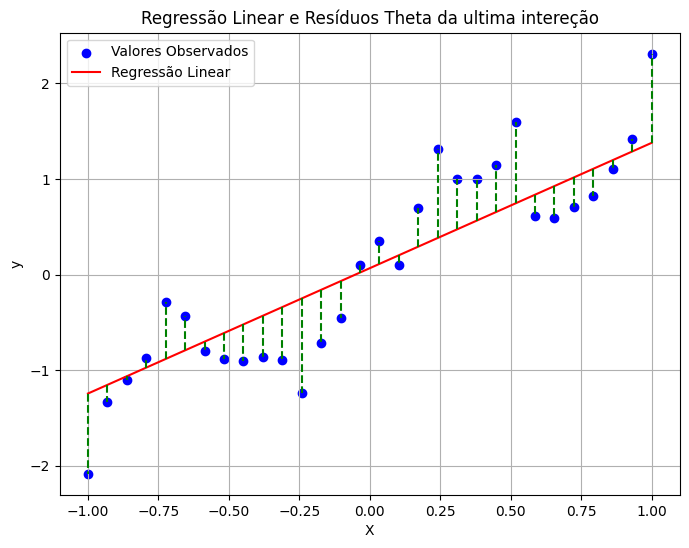

In [19]:
# Plotar os dados e a reta de regressão linear
plt.figure(figsize=(8,6))


# Plotando os pontos (valores observados)
plt.scatter(x, y, color='blue', label='Valores Observados')

# Plotando a linha de regressão
plt.plot(x, y_previsto_final, color='red', label='Regressão Linear')

# Plotando as diferenças (resíduos) como linhas pontilhadas
for i in range(len(x)):
    plt.plot([x[i], x[i]], [y_previsto_final[i], y[i]], color='green', linestyle='--')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Regressão Linear e Resíduos Theta da ultima intereção')
plt.legend()
plt.grid(True)
plt.show()

##c) Apresente os parâmetros do modelo, o MSE e a curva de aprendizagem                                        
##obtidos pelo algoritmo SGD (gradiente descendente estocástico).
##Plote a reta resultante sobre os dados.             

In [26]:

def gradiente_estocastico(X, y, theta, taxa_de_aprendizado, epocas):
    """
    Calcula os parâmetros do modelo de regressão linear utilizando gradiente descendente estocástico.

    Parâmetros:
    - X: matriz de características, incluindo a coluna de bias
    - y: vetor de saída
    - taxa_de_aprendizado: taxa de aprendizado para calibrar a atualização dos parâmetros
    - epocas: número de épocas (ou iterações) para otimizar o modelo

    Retorna:
    - theta: vetor de parâmetros do modelo
    - custo_history: lista de taxas de erro em cada iteração
    """
    m = len(y)  # Número de amostras de treinamento
    custo_history = []  # Lista para armazenar o histórico de custos

    for _ in range(epocas):
        for i in range(m):
            # Seleciona aleatoriamente um exemplo de treinamento
            aleatorio_index = np.random.randint(0, m)
            X_aleatorio = X[aleatorio_index, :].reshape(1, -1)
            y_aleatorio = y[aleatorio_index].reshape(1, )

            # Calcula a previsão para o exemplo de treinamento atual
            previsao = np.dot(X_aleatorio, theta)

            # Calcula o erro para o exemplo de treinamento atual
            erro = previsao - y_aleatorio[0]

            # Atualiza os parâmetros theta usando o gradiente descendente estocástico
            gradiente = X_aleatorio.T.dot(erro)
            theta = theta - (taxa_de_aprendizado * gradiente)

            # Calcula o custo atual e armazena no histórico de custos
            custo = np.mean(np.square(erro))
            custo_history.append(custo)

    return theta, custo_history


In [27]:
epocas = 100
teta_com_estocastico, custo_history = gradiente_estocastico(X_b, y, teta, taxa_de_aprendizado, epocas)

In [28]:
# Calcular previsões usando os parâmetros theta finais
y_previsto_final_estocastico = X_b.dot(teta_com_estocastico)

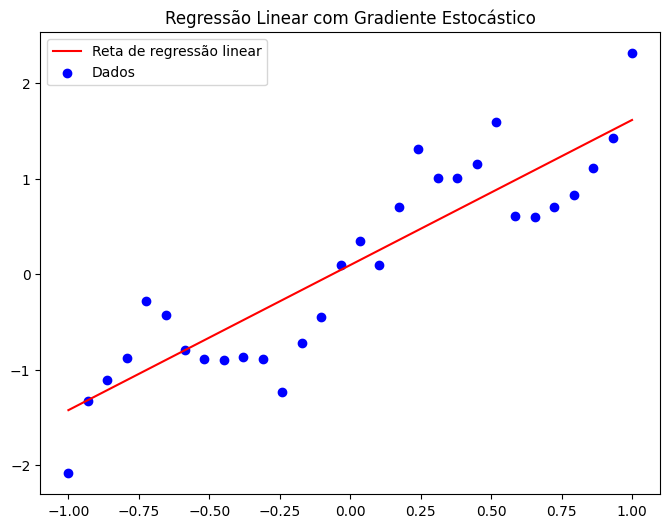

In [29]:
# Plotar os dados e a reta de regressão linear
plt.figure(figsize=(8,6))

# Plotar a reta de regressão linear
plt.plot(x, y_previsto_final_estocastico, color='red', label='Reta de regressão linear')

# Plotar os dados de dispersão (pontos)
plt.scatter(x, y , color='blue', label='Dados')


# Adicionar título ao gráfico
plt.title('Regressão Linear com Gradiente Estocástico')

# Exibir a legenda
plt.legend()
# Exibir o gráfico

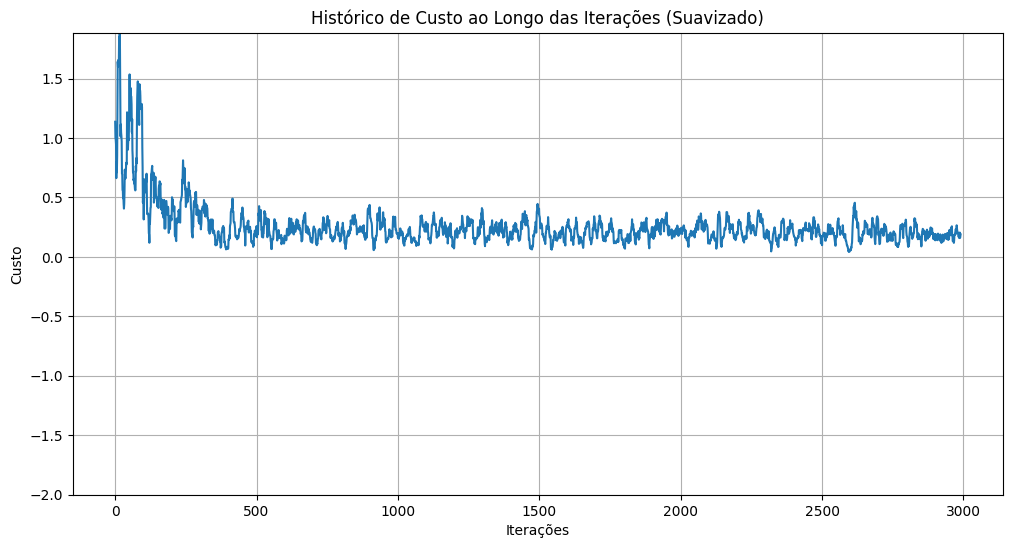

In [37]:
#Plotar o gráfico do histórico de custo

def plot_historico_custo(custo_history, janela=10):
    # Suavizar a curva usando uma média móvel
    custo_suavizado = np.convolve(custo_history, np.ones(janela)/janela, mode='valid')

    # Plotar o histórico de custo
    plt.figure(figsize=(12, 6))
    plt.plot(range(len(custo_suavizado)), custo_suavizado, linestyle='-')
    plt.xlabel('Iterações')
    plt.ylabel('Custo')
    plt.title('Histórico de Custo ao Longo das Iterações (Suavizado)')
    plt.ylim(-2, max(custo_suavizado))  # Definir o intervalo de valores para o eixo y
    plt.grid(True)
    plt.show()

plot_historico_custo(custo_history)

In [25]:
# Calculando o MSE
mse = np.mean((y_previsto_final_estocastico - y) ** 2)
print(f"Parâmetros do modelo (theta): {teta_final}")
print(f"MSE (Erro Quadrático Médio): {mse}")

Parâmetros do modelo (theta): [0.06717364 1.31055216]
MSE (Erro Quadrático Médio): 0.21463472821083276
